In [1]:
# importing relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats import weightstats as stests
from statsmodels.stats.proportion import proportions_ztest

In [2]:
#importing data from CSV file
mydata = pd.DataFrame(pd.read_csv('insurance.csv'))

In [3]:
mydata.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#checking the shape of data
print("Total rows and cloumns:",mydata.shape)
print("Total cell count:",mydata.size)

Total rows and cloumns: (1338, 7)
Total cell count: 9366


In [5]:
#checking the types of data
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [6]:
#checking null values on the whole
mydata.isnull().any().any()

False

In [7]:
#checking null values in individual columns
mydata.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

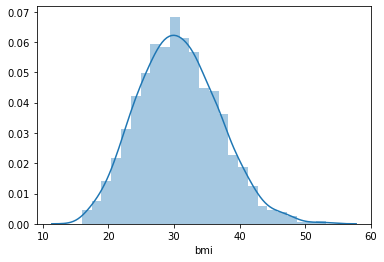

In [8]:
sns.distplot(mydata['bmi'])
plt.show()

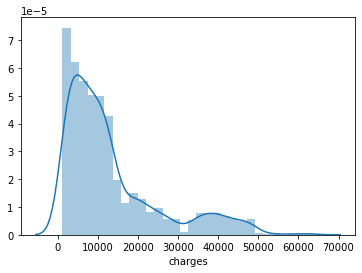

In [9]:
sns.distplot(mydata['charges'])
plt.show()

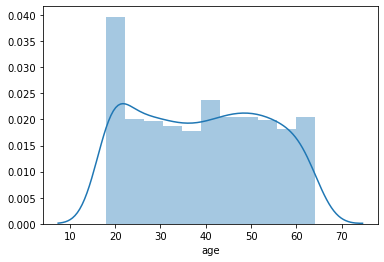

In [10]:
sns.distplot(mydata['age'])
plt.show()

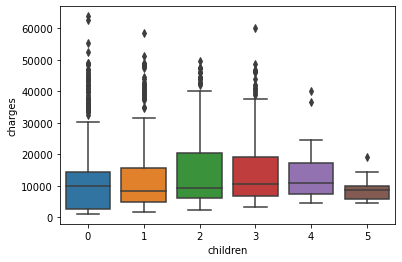

In [25]:
sns.boxplot(x = 'children', y = 'charges', data = mydata) 

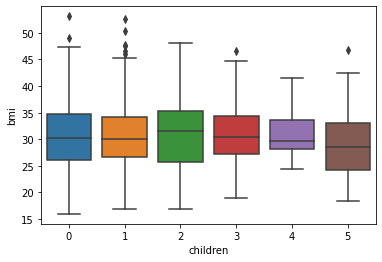

In [12]:
sns.boxplot(x = 'children', y = 'bmi', data = mydata) 

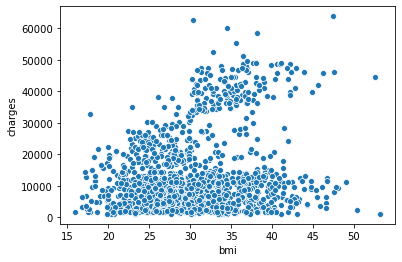

In [13]:
sns.scatterplot(data=mydata, x="bmi", y="charges")

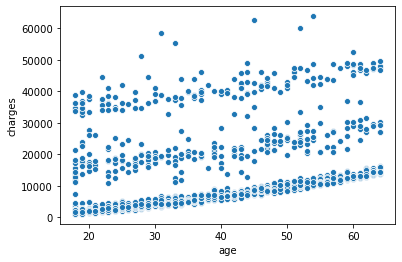

In [14]:
sns.scatterplot(data=mydata, x="age", y="charges")

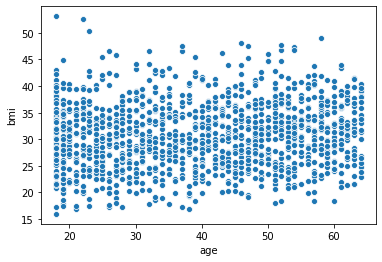

In [15]:
sns.scatterplot(data=mydata, x="age", y="bmi")

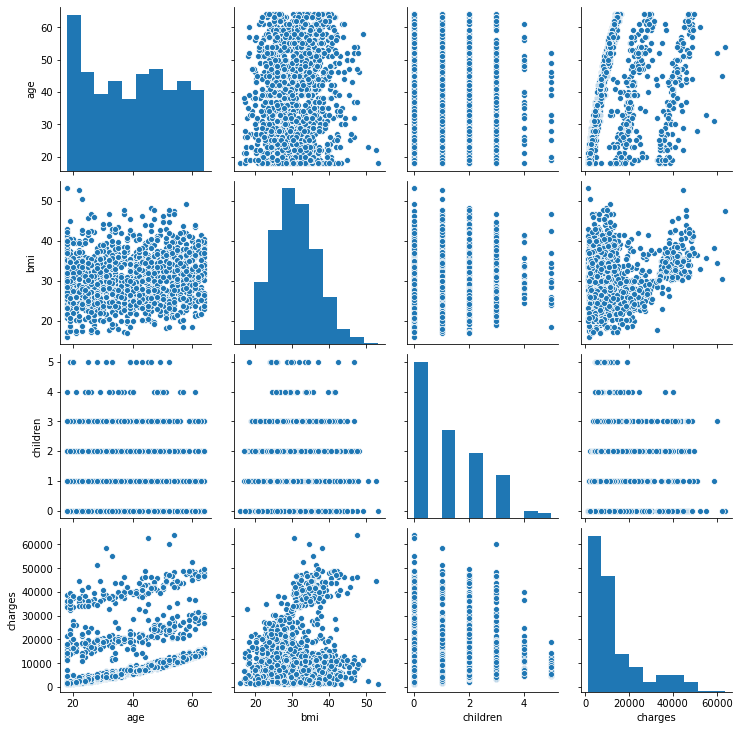

In [16]:
sns.pairplot(mydata)

# measure of skewness

In [17]:
mydata.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

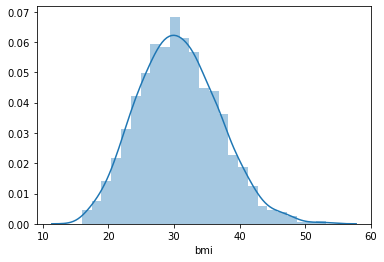

In [18]:
sns.distplot(mydata['bmi'])
plt.show()

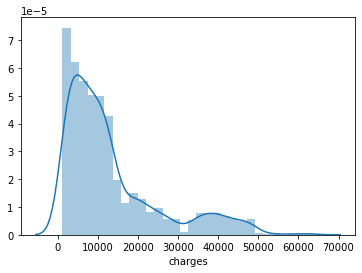

In [19]:
sns.distplot(mydata['charges'])
plt.show()

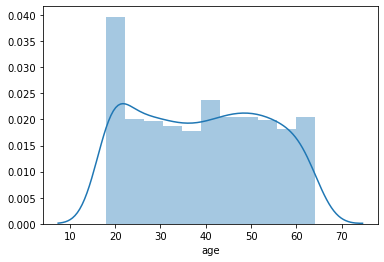

In [20]:
sns.distplot(mydata['age'])
plt.show()

# Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

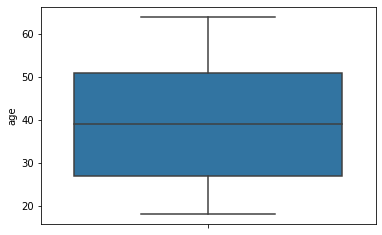

In [21]:
sns.boxplot(y=mydata['age'])

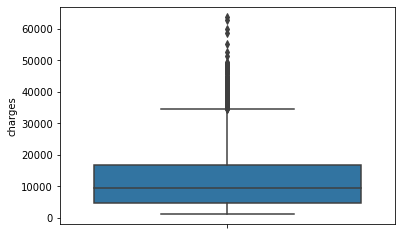

In [22]:
sns.boxplot(y=mydata['charges'])

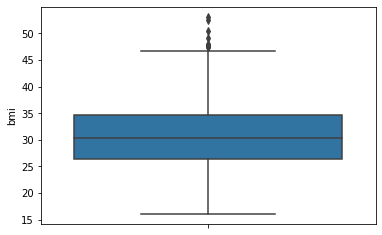

In [23]:
sns.boxplot(y=mydata['bmi'])

# Distribution of categorical columns

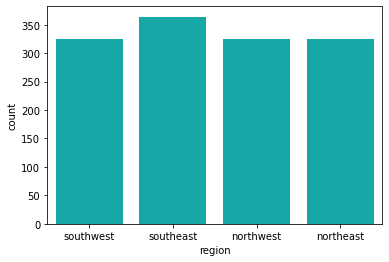

In [24]:
sns.countplot(x="region", data=mydata, color="c")

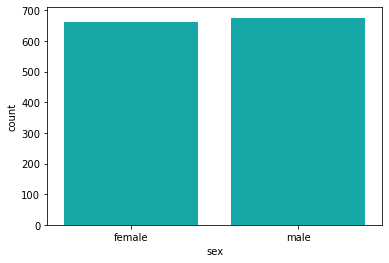

In [25]:
sns.countplot(x="sex", data=mydata, color="c")

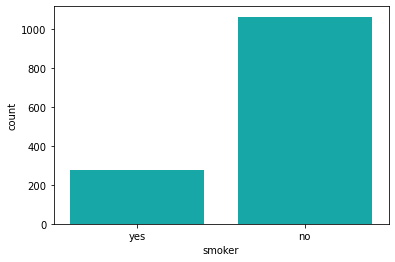

In [26]:
sns.countplot(x="smoker", data=mydata, color="c")

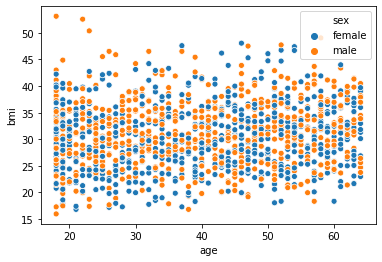

In [27]:
sns.scatterplot(data=mydata, x="age", y="bmi",hue="sex")

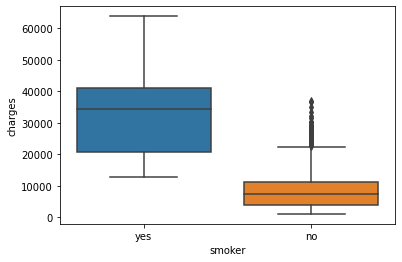

In [49]:
sns.boxplot(x = 'smoker', y = 'charges', data = mydata)

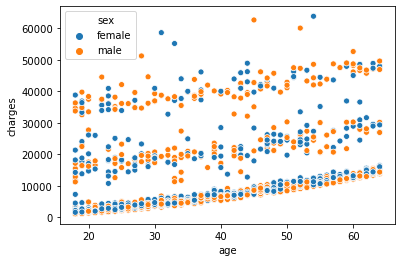

In [28]:
sns.scatterplot(data=mydata, x="age", y="charges",hue="sex")

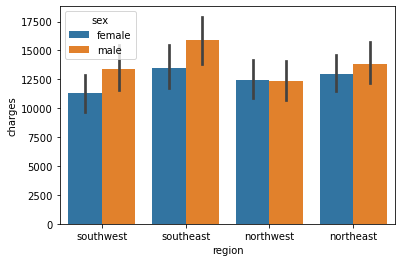

In [29]:
sns.barplot(x="region", y="charges",hue="sex", data=mydata)

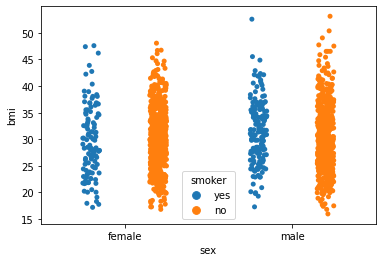

In [31]:
sns.stripplot(x ='sex', y ='bmi', data = mydata,jitter = True, hue ='smoker', dodge = True) 

In [36]:
data = mydata.groupby("region")["bmi"].sum()
data

region
northeast     9452.215
northwest     9489.930
southeast    12141.580
southwest     9943.900
Name: bmi, dtype: float64

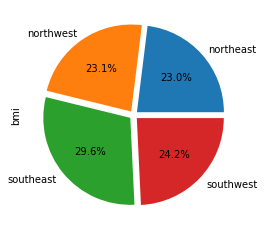

In [41]:
data.plot.pie(autopct="%.1f%%",explode=[0.05]*4);

# Pair plot that includes all the columns of the data frame


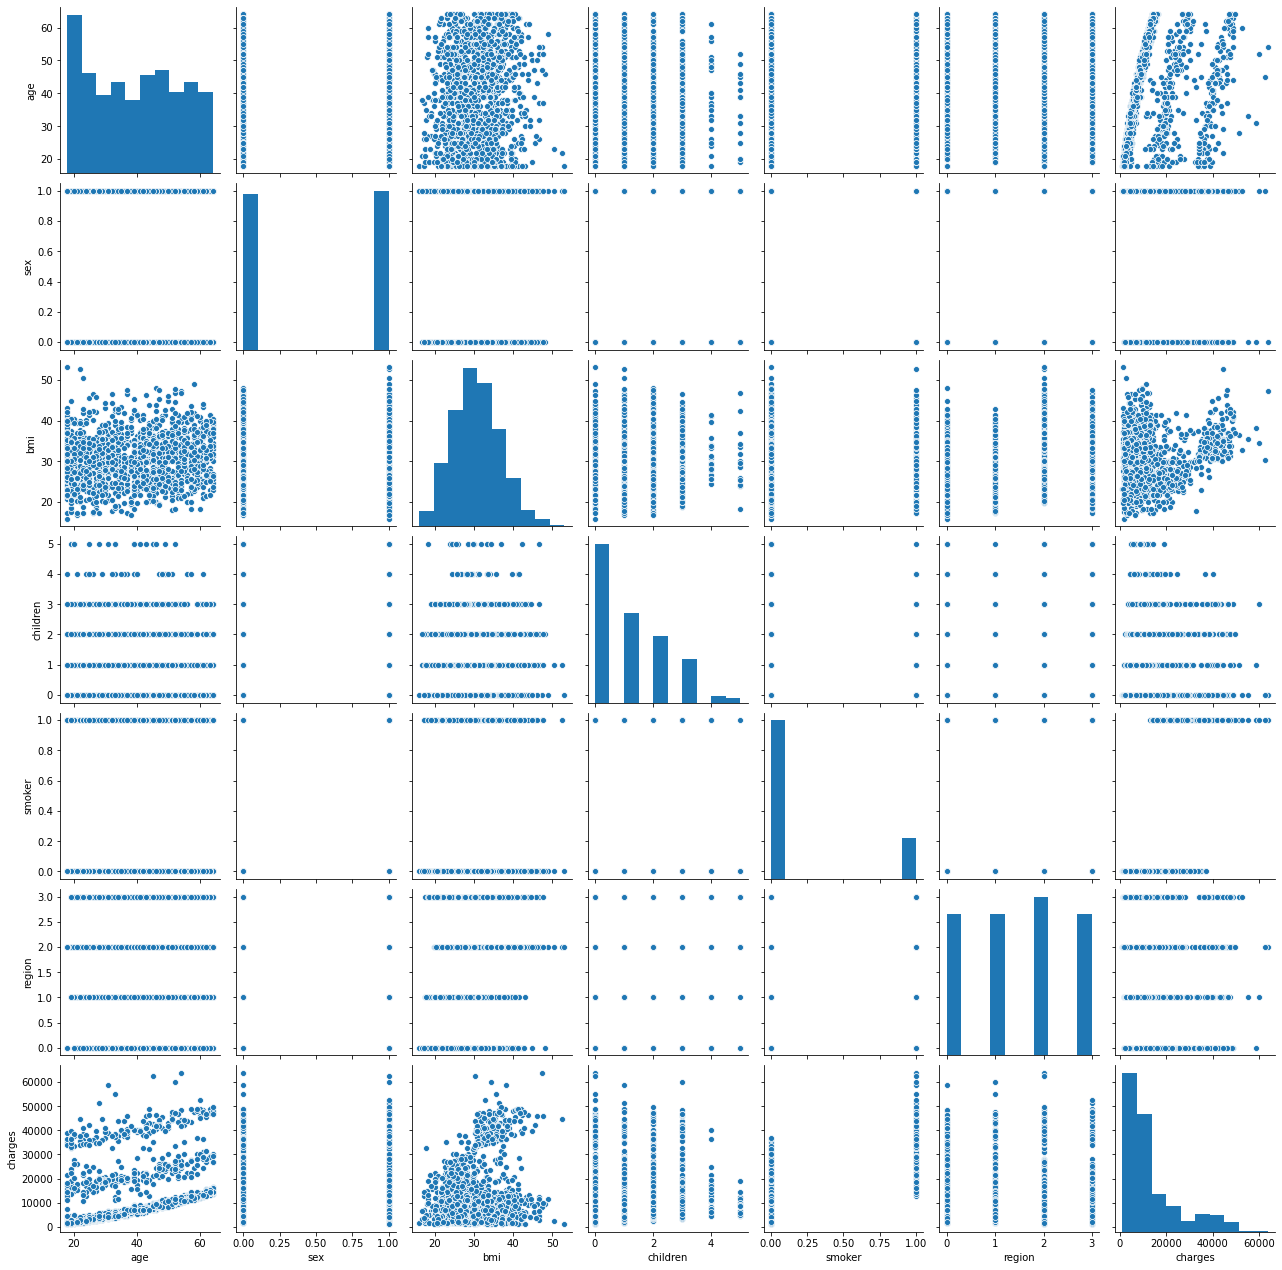

In [16]:
encoded = copy.deepcopy(mydata)
encoded.loc[:,['sex', 'smoker', 'region']] = encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(encoded)  
plt.show()

# Do charges of people who smoke differ significantly from the people who don't?

Charges are significantly higher for smokers compared to non smoking customers


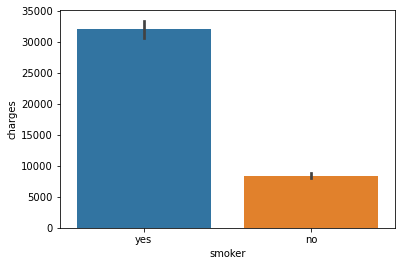

In [26]:
sns.barplot(x='smoker', y='charges', data=mydata);
print("Charges are significantly higher for smokers compared to non smoking customers")

In [4]:
smokers=pd.DataFrame(mydata[mydata['smoker']=='yes'])
smokers_charges=pd.DataFrame([smokers.charges]).transpose()
smokers_charges

,charges
0,16884.92400
11,27808.72510
14,39611.75770
19,36837.46700
23,37701.87680
...,...
1313,36397.57600
1314,18765.87545
1321,28101.33305
1323,43896.37630


In [5]:
nonsmokers=pd.DataFrame(mydata[mydata['smoker']=='no'])
nonsmokers_charges=pd.DataFrame([nonsmokers.charges]).transpose()
nonsmokers_charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [14]:
#H0:smoker and non smoker charges are equal
#H1:Smoker and non smoker charges are not equal
p=0.05
stat, pval = stests.ztest(smokers_charges, x2 = nonsmokers_charges, value=790,alternative='two-sided')
print(float(stat))
print(pval)
print(stat,pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")


45.10388862480834
[0.]
[45.10388862] [0.]
reject null hypothesis


# Does bmi of males differ significantly from that of females

Visualizing the bmi's of male and Female


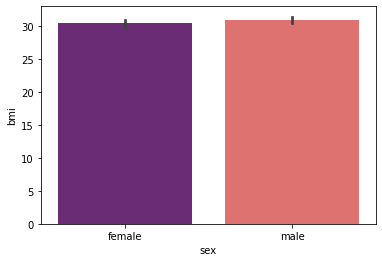

In [28]:
print("Visualizing the bmi's of male and Female")
sns.barplot(x='sex', y='bmi', data=mydata,palette ='magma');

In [22]:
Females=pd.DataFrame(mydata[mydata['sex']=='female'])
Female_bmi=pd.DataFrame([Females.bmi]).transpose()
Female_bmi

,bmi
0,27.90
5,25.74
6,33.44
7,27.74
9,25.84
...,...
1332,44.70
1334,31.92
1335,36.85
1336,25.80


In [23]:
Males=pd.DataFrame(mydata[mydata['sex']=='male'])
Male_bmi=pd.DataFrame([Males.bmi]).transpose()
Male_bmi

,bmi
1,33.770
2,33.000
3,22.705
4,28.880
8,29.830
...,...
1324,25.935
1325,33.535
1327,30.030
1329,38.600


In [21]:
#H0:Female bmi and male bmi are equal
#H1:Female bmi and male bmi are not equal
p=0.05
stat, pval = stests.ztest(Female_bmi, x2 = Male_bmi, value=0,alternative='two-sided')
print(float(stat))
print(float(pval))
print(stat,pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("Fail to reject null hypothesis")


-1.6967526357522242
0.08974343679943912
[-1.69675264] [0.08974344]
Fail to reject null hypothesis


# Is the proportion of smokers significantly different in different genders

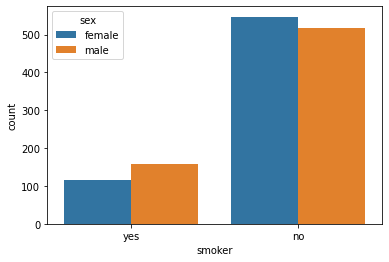

In [31]:
sns.countplot(x="smoker",hue="sex", data=mydata)

In [3]:
female_smokers = mydata[mydata['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = mydata[mydata['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = mydata.sex.value_counts()[1] # number of females in the data
n_males = mydata.sex.value_counts()[0] #number of males in the data
print([female_smokers, male_smokers] , [n_females, n_males])

[115, 159] [662, 676]


In [7]:
#H0: Male smokers and Female smokers ratio is same
#H1: Male smokers and Female smokers ratio is different


stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} We reject the null hypohesis')
else:
    print(f'With a p-value of {round(pval,4)} We Fail to reject the null hypothesis')

With a p-value of 0.0053 We reject the null hypohesis


# Is the distribution of bmi across women with no children, one child and two children, the same

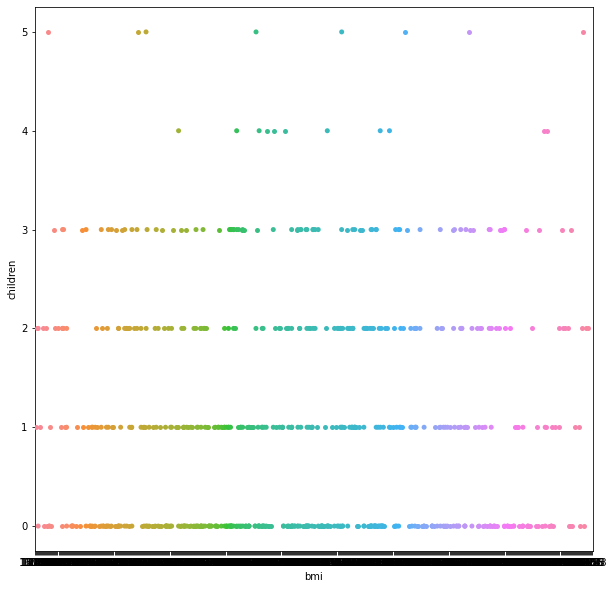

In [32]:
plt.figure(figsize=(10,10))
sns.stripplot(mydata['bmi'], mydata[mydata['sex']=='female']['children']);

In [30]:
female_df = mydata[mydata['sex'] == 'female']

zero = pd.DataFrame({'Children':0,'bmi':female_df[female_df.children == 0]['bmi']})
one = pd.DataFrame({'Children':1,'bmi':female_df[female_df.children == 1]['bmi']})
two = pd.DataFrame({'Children':2,'bmi':female_df[female_df.children == 2]['bmi']})
bmis=pd.DataFrame()
bmis=bmis.append(zero)
bmis=bmis.append(one)
bmis=bmis.append(two)

In [31]:
#Ho = "No. of children has no effect on bmi"   
#Ha = "No. of children has an effect on bmi"   
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

formula = 'bmi ~ C(Children)'
model = ols(formula, bmis).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

                   sum_sq     df         F    PR(>F)
C(Children)     24.590123    2.0  0.334472  0.715858
Residual     20695.661583  563.0       NaN       NaN


In [ ]:
As PR value (0.716)>0.05 we conclude that children has no effect on BMI and we accept null hypothesis.